In [2]:
import pandas as pd

In [3]:
receptor_df = pd.read_csv('../dictionary.csv')
docking_df = pd.read_csv('../../Analysis_of_Docking/data/rmsd_values_base.csv')[['template', 'docked', 'rmsd', 'uniprot_id']]

In [4]:
docking_df['receptor_rmsd'] = None
docking_df['distance'] = None

for index, template, docked in docking_df[['template', 'docked']].itertuples():

    if template == docked:
        docking_df.at[index, 'receptor_rmsd'] = 0
        docking_df.at[index, 'distance'] = 0
        continue
    try:
        rmsd, d = receptor_df.loc[(receptor_df['ref1']==template) & (receptor_df['ref2']==docked)][['rmsd', 'distance']].values[0]
    except:
        rmsd, d = receptor_df.loc[(receptor_df['ref2']==template) & (receptor_df['ref1']==docked)][['rmsd', 'distance']].values[0]

    docking_df.at[index, 'receptor_rmsd'] = rmsd
    docking_df.at[index, 'distance'] = d

print('Done!')

Done!


In [160]:
docking_df.loc[(docking_df['distance']>15) &
               (docking_df['receptor_rmsd']<0.5) &
                (docking_df['receptor_rmsd']<3)].loc[docking_df['rmsd']>3]

,template,docked,rmsd,uniprot_id,receptor_rmsd,distance
16510,2PIX_FLF,2YHD_AV6,21.797,P10275,0.283614,15.718
16598,2YHD_AV6,2PIX_FLF,18.959,P10275,0.283614,15.718
16797,2PIT_4HY,2YHD_AV6,17.169,P10275,0.130045,15.0262
18732,2R9X_WH6,4OKP_2V0,10.130,P00811,0.106598,16.8181
18846,2R9W_23C,4OKP_2V0,11.866,P00811,0.101865,16.7124
18943,4OKP_2V0,2R9X_WH6,13.854,P00811,0.106598,16.8181
18944,4OKP_2V0,4KZ7_1U5,12.408,P00811,0.0908645,16.5009
18948,4OKP_2V0,4KZ6_ZB6,7.869,P00811,0.0475455,16.8949
18954,4OKP_2V0,3GVB_3GV,4.157,P00811,0.0766039,17.3179
20271,4ISF_1FX,3F9M_GLC,8.531,P35557,0.0903039,15.8706


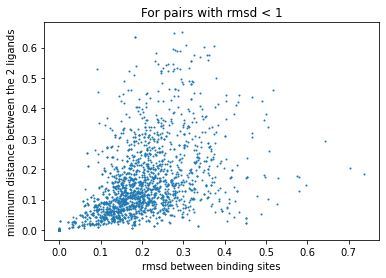

In [148]:
plt.scatter(docking_df['receptor_rmsd'][docking_df['rmsd']<1],
            docking_df['distance'][docking_df['rmsd']<1]
            , s=1)
plt.title('For pairs with rmsd < 1')
plt.xlabel('rmsd between binding sites')
plt.ylabel('minimum distance between the 2 ligands')
plt.savefig(fname='../plots/scatter_rmsd_bindingsites_vs_distance_rmsd<1.svg')
plt.show()

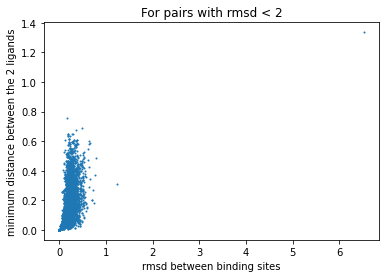

In [147]:
from matplotlib import pyplot as plt

plt.scatter(docking_df['receptor_rmsd'][docking_df['rmsd']<2],
            docking_df['distance'][docking_df['rmsd']<2]
            , s=1)
plt.title('For pairs with rmsd < 2')
plt.xlabel('rmsd between binding sites')
plt.ylabel('minimum distance between the 2 ligands')
plt.savefig(fname='../plots/scatter_rmsd_bindingsites_vs_distance_rmsd<2.svg')
plt.show()

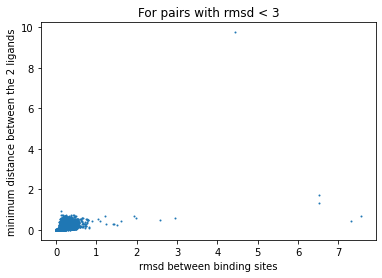

In [154]:
plt.scatter(docking_df['receptor_rmsd'][docking_df['rmsd']<3],
            docking_df['distance'][docking_df['rmsd']<3]
            , s=1)
plt.title('For pairs with rmsd < 3')
plt.xlabel('rmsd between binding sites')
plt.ylabel('minimum distance between the 2 ligands')
plt.savefig(fname='../plots/scatter_rmsd_bindingsites_vs_distance_rmsd<3.svg')
plt.show()

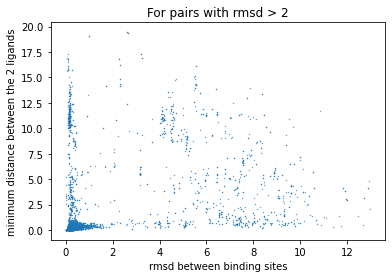

In [151]:
plt.scatter(docking_df['receptor_rmsd'][docking_df['rmsd']>2],#[docking_df['rmsd']<10],
            docking_df['distance'][docking_df['rmsd']>2]#[docking_df['rmsd']<10]
            , s=0.1)
plt.xlabel('rmsd between binding sites')
plt.title('For pairs with rmsd > 2')
plt.savefig(fname='../plots/scatter_rmsd_bindingsites_vs_distance_rmsd>2.svg')
plt.xlabel('rmsd between binding sites')
plt.ylabel('minimum distance between the 2 ligands')
plt.show()

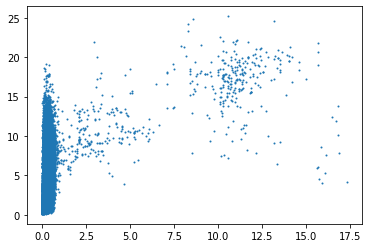

In [158]:
plt.scatter(docking_df['distance'][docking_df['receptor_rmsd']<0.5],
            docking_df['rmsd'][docking_df['receptor_rmsd']<0.5]
            , s=1)
plt.show()

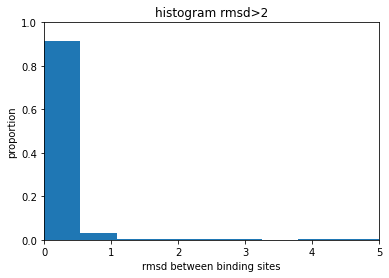

In [149]:
x, bins, p = plt.hist(docking_df['receptor_rmsd'][docking_df['rmsd']>2], bins=24, density=True)
plt.xlabel('rmsd between binding sites')
plt.ylabel('proportion')
plt.title('histogram rmsd>2')
for item in p:
    item.set_height(item.get_height()/sum(x))
plt.xlim([0,5])
plt.ylim([0,1])
plt.savefig(fname='../plots/hist_rmsd_bindingsites_rmsd>2.svg')
plt.show()

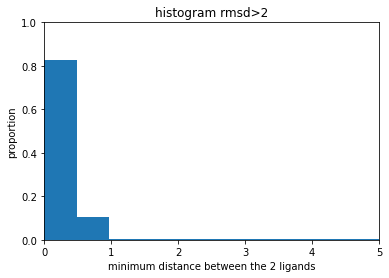

In [150]:
x, bins, p = plt.hist(docking_df['distance'][docking_df['rmsd']>2], bins=40, density=True)
plt.xlabel('minimum distance between the 2 ligands')
plt.ylabel('proportion')
plt.title('histogram rmsd>2')
for item in p:
    item.set_height(item.get_height()/sum(x))
plt.xlim([0,5])
plt.ylim([0,1])
plt.savefig(fname='../plots/hist_distance_rmsd>2.svg')
plt.show()

